# Regularization 

- This is a form of regression, that constrains / regularizes or shrinks the coefficient estimates towards zero.
- This technique discourages learning a more complex or flexible model, so as to avoid the risk of overfitting.
- *Regularization is a technique used to reduce overfitting in machine learning models by adding a penalty term to the loss function.
- *It discourages the model from becoming too complex by shrinking the learned parameters (weights), ensuring better generalization to unseen data.

Regularization can achieve this motive with 2 techniques:
- Lasoo Regularization / L1
- Ridge Regularization / L2
- ElasticNet

### Why OverFitting Happens
- Model fits training data too well, including noise
- Learns overly complex patterns that don’t generalize
- High variance and poor performance on test data

### Note: 
- Regularization is used to reduce the value of the coeficient of the x variable to reduce overfitting or to make features similar which helps to improve models performances.

______

# Lasso Regularization (L1)
- Lasso (Least Absolute Shrinkage and Selection Operator) is a linear regression technique that adds a penalty equal to the absolute value of the coefficients' magnitudes to the loss function.
- Its key feature is that it can shrink some coefficients to exactly zero, effictively performing ferature selection.
- This is a regularization technique used in feature selection using a shrinkage method also referred to as the penalized regression method.
- Lasso regression magnitude of coefficients can be exactly zero.

Lasso Cost Function = Loss + λ*∑*|w|

Where;
- loss = cost function for the model(sum of squared residual)
- λ = penalty (Hyperparameter)
- w = slope of the curve

### How Lasso Works
##### Without Regularization (linear Regression):
- Find weights w that minimize only MSE:
    Minimize-  ∑(yi − y^i)^2

##### With Lasso:
- Winimize both: 
 1. MSE
 2. Sum of absolute coeficients (i.e., ∣ 𝑤𝑗 ∣ )
- Forces unnecessary weights to zero → sparsity

### Graph for both
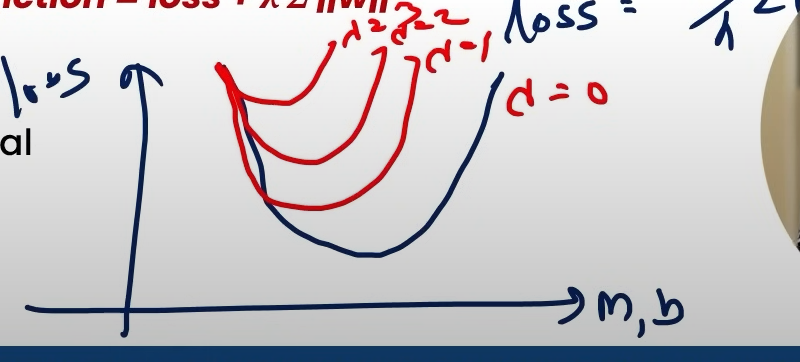

##### Code Example: Lasso Regression

Intercept: 51.5
Coefficient: [49.5]
Prediction for 6: 348.5


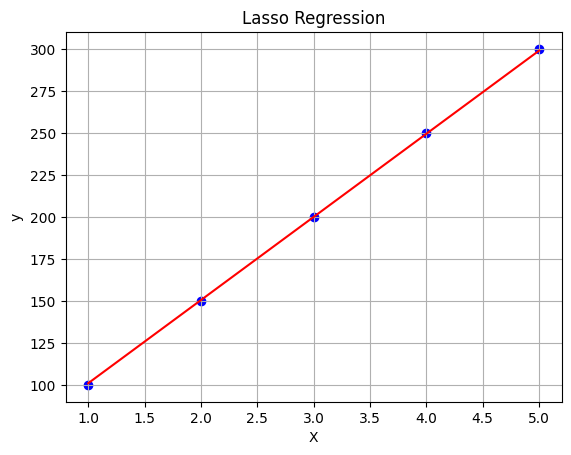

In [2]:
# Model training with Lasso 

import numpy as np
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Sample data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([100, 150, 200, 250, 300])

# Lasso Model
model = Lasso(alpha=1.0)  # alpha = λ
model.fit(X, y)

# Prediction
pred = model.predict(X)

# Output
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("Prediction for 6:", model.predict([[6]])[0])

# Plot
plt.scatter(X, y, color='blue')
plt.plot(X, pred, color='red')
plt.title("Lasso Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

In [3]:
# Feature Selection with Lasso

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LassoCV

# Load data
X, y = load_diabetes(return_X_y=True)

# Use Lasso with Cross-Validation to find best alpha
model = LassoCV(cv=5)
model.fit(X, y)

# Output important features
print("Best alpha (λ):", model.alpha_)
print("Selected features (non-zero weights):")
print(np.where(model.coef_ != 0)[0])


Best alpha (λ): 0.003753767152691846
Selected features (non-zero weights):
[0 1 2 3 4 5 7 8 9]


### Tuning the Regularization Parameter (λ or alpha)
- Too low: Overfitting
- Too high: Underfitting, too many zeroed weights
- Best practice: Use cross-validation

In [4]:
from sklearn.linear_model import LassoCV
model = LassoCV(alphas=np.linspace(0.01, 10, 100), cv=5)
model.fit(X, y)

LassoCV(alphas=array([ 0.01      ,  0.11090909,  0.21181818,  0.31272727,  0.41363636,
        0.51454545,  0.61545455,  0.71636364,  0.81727273,  0.91818182,
        1.01909091,  1.12      ,  1.22090909,  1.32181818,  1.42272727,
        1.52363636,  1.62454545,  1.72545455,  1.82636364,  1.92727273,
        2.02818182,  2.12909091,  2.23      ,  2.33090909,  2.43181818,
        2.53272727,  2.63363636,  2.73454545,  2.83545455,  2.93636364,
        3.03727273,  3.138...
        6.56909091,  6.67      ,  6.77090909,  6.87181818,  6.97272727,
        7.07363636,  7.17454545,  7.27545455,  7.37636364,  7.47727273,
        7.57818182,  7.67909091,  7.78      ,  7.88090909,  7.98181818,
        8.08272727,  8.18363636,  8.28454545,  8.38545455,  8.48636364,
        8.58727273,  8.68818182,  8.78909091,  8.89      ,  8.99090909,
        9.09181818,  9.19272727,  9.29363636,  9.39454545,  9.49545455,
        9.59636364,  9.69727273,  9.79818182,  9.89909091, 10.        ]),
        cv=5)

----

# Ridge Rigression (L2 Regulariztion)

### What is Ridge Regression?
- Ridge Regression is a linear regression model with L2 regularization, meaning it adds a penalty proportional to the square of the magnitude of the coefficients.
- It shrinks coeficients, but unlike Lasso, it never forces them to exactly zero.
- Rigde Regression, also known as L2 regularization, is an extension to linear regression that indroduces a regularization term to reduce model complexity and help prevent overfitting.
- Ridge Regression is working value/magnitude of coefficients is almost equal to zero.

Ridge Cost Function = Loss + λ*∑*|w|^2
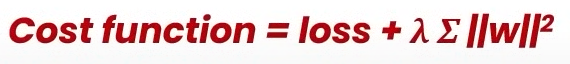

Where;
- loss = cost function for the model(sum of squared residual)
- λ = penalty (Hyperparameter)
- w = slope of the curve

### Why Use Ridge Regression?
- To prevent overfitting in models with many features.
- To handle multicollinearity (highly correlated predictors).
- When we want to retain all features but reduce their impact.

### Code Example: Ridge Regression

Intercept: 61.45454545454547
Coefficient: [48.18181818]
Prediction for 6: 350.5454545454545


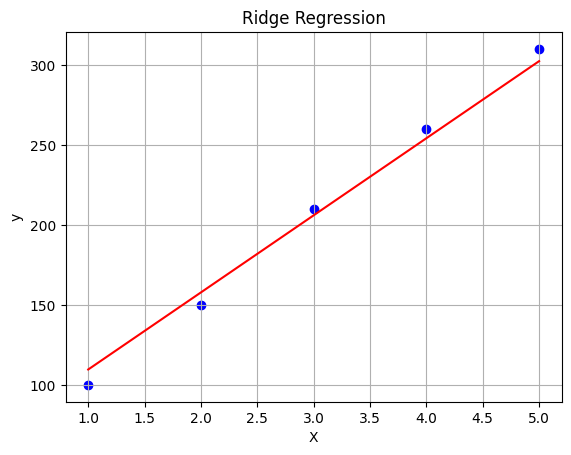

In [1]:
# Model Development using Ridge

import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Data
X = np.array([[1], [2], [3], [4], [5]])
y = np.array([100, 150, 210, 260, 310])

# Ridge Model
model = Ridge(alpha=1.0)  # alpha = λ
model.fit(X, y)

# Predict
y_pred = model.predict(X)

# Output
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)
print("Prediction for 6:", model.predict([[6]])[0])

# Visualization
plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red')
plt.title("Ridge Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

In [6]:
# Choosing the Best λ (Regularization Parameter)

from sklearn.linear_model import RidgeCV

# Try different alphas
model = RidgeCV(alphas=[0.01, 0.1, 1, 10], cv=5)
model.fit(X, y)
print("Best alpha:", model.alpha_)

Best alpha: 0.01


In [7]:
# High Dimensional Data

from sklearn.datasets import load_diabetes
from sklearn.linear_model import RidgeCV

X, y = load_diabetes(return_X_y=True)
model = RidgeCV(alphas=np.logspace(-3, 3, 100), cv=5)
model.fit(X, y)
print("Best Alpha:", model.alpha_)
print("Non-zero Coefficients:", model.coef_)

Best Alpha: 0.001
Non-zero Coefficients: [  -9.54916175 -239.08695779  520.3693746   323.82274522 -712.32215918
  413.37912498   65.81132269  167.51300694  720.9399241    68.12336029]


___

# Implementation

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [16]:
ds = pd.read_csv("House Price Prediction Data.csv")
ds.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price
0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,313000.0
1,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,2384000.0
2,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,342000.0
3,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,420000.0
4,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,550000.0


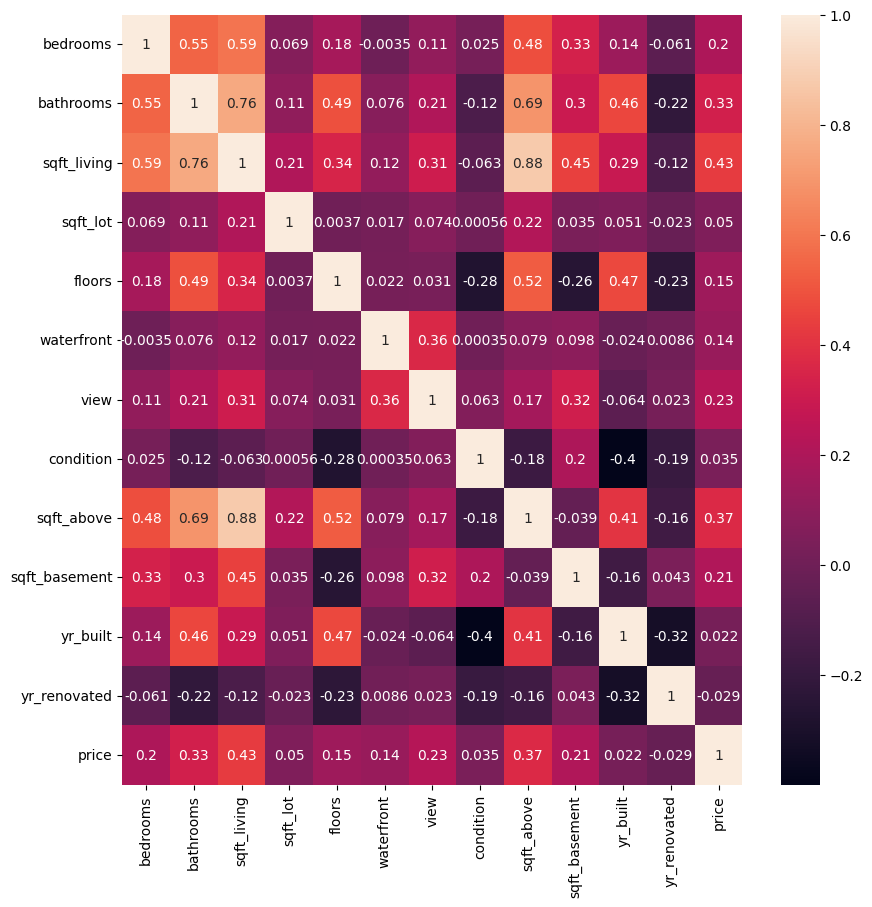

In [ ]:
plt.figure(figsize= (10, 10))
sns.heatmap(data= ds.corr(), annot=True)
plt.show()

In [21]:
# Split it into features and Targets
x= ds.drop('price', axis=1)
y= ds['price']
x, y

(      bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0            3       1.50         1340      7912     1.5           0     0   
 1            5       2.50         3650      9050     2.0           0     4   
 2            3       2.00         1930     11947     1.0           0     0   
 3            3       2.25         2000      8030     1.0           0     0   
 4            4       2.50         1940     10500     1.0           0     0   
 ...        ...        ...          ...       ...     ...         ...   ...   
 4595         3       1.75         1510      6360     1.0           0     0   
 4596         3       2.50         1460      7573     2.0           0     0   
 4597         3       2.50         3010      7014     2.0           0     0   
 4598         4       2.00         2090      6630     1.0           0     0   
 4599         3       2.50         1490      8102     2.0           0     0   
 
       condition  sqft_above  sqft_basement  yr_bu

In [24]:
# Scall the data
SC = StandardScaler()
X = pd.DataFrame(SC.fit_transform(x))  # We comverted the scalled data into data frame from array as we get the scalled data into array.   
X

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670
1,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693
2,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693
3,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693
4,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,-0.441122,-0.524202,-0.653458,-0.236689,-0.951388,-0.085004,-0.309194,0.809652,-0.368025,-0.672464,-0.564651,1.195121
4596,-0.441122,0.432802,-0.705374,-0.202882,0.906555,-0.085004,-0.309194,-0.667112,-0.426025,-0.672464,0.410840,1.225755
4597,-0.441122,0.432802,0.904009,-0.218462,0.906555,-0.085004,-0.309194,-0.667112,1.371962,-0.672464,1.285418,-0.825693
4598,0.659291,-0.205201,-0.051238,-0.229164,-0.951388,-0.085004,-0.309194,-0.667112,-0.878421,1.525401,0.108101,-0.825693


In [25]:
# Split the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=42)
X_train, X_test, y_train, y_test

(            0         1         2         3         4         5         6   \
 2095 -0.441122 -0.843204 -0.290049 -0.192013 -0.951388 -0.085004 -0.309194   
 1173 -1.541536 -1.481206 -1.110315 -0.251627 -0.951388 -0.085004  2.260442   
 1954  0.659291 -0.843204 -0.227750 -0.124009 -0.951388 -0.085004 -0.309194   
 256  -0.441122 -0.524202 -0.580776 -0.159014 -0.951388 -0.085004  0.975624   
 3341 -0.441122  0.113800 -0.518478 -0.179833 -0.951388 -0.085004 -0.309194   
 ...        ...       ...       ...       ...       ...       ...       ...   
 4426 -0.441122 -1.481206 -0.996101 -0.274536 -0.022416 -0.085004 -0.309194   
 466   0.659291 -0.205201  0.395236 -0.246722 -0.951388 -0.085004 -0.309194   
 3092 -0.441122 -1.481206 -1.027250 -0.186940 -0.951388 -0.085004 -0.309194   
 3772 -1.541536 -1.481206 -1.276445 -0.358147 -0.022416 -0.085004 -0.309194   
 860  -1.541536 -1.481206 -0.674224 -0.307340 -0.951388 -0.085004 -0.309194   
 
             7         8         9         10     

In [67]:
# Define the Models and train them using fit function.
l_model = LinearRegression()
lasso_reg = Lasso(alpha=50)   # Alpha value can be changed based on accuracy
ridge_reg = Ridge(alpha=10)

In [68]:
# Train it with linear regression
l_model.fit(X_train, y_train)
l_model.score(X_test, y_test)*100

4.491865671764838

In [69]:
print(mean_squared_error(y_test, l_model.predict(X_test)))
print(mean_absolute_error(y_test, l_model.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, l_model.predict(X_test))))

804480138625.489
203136.0691137104
896928.1680410584


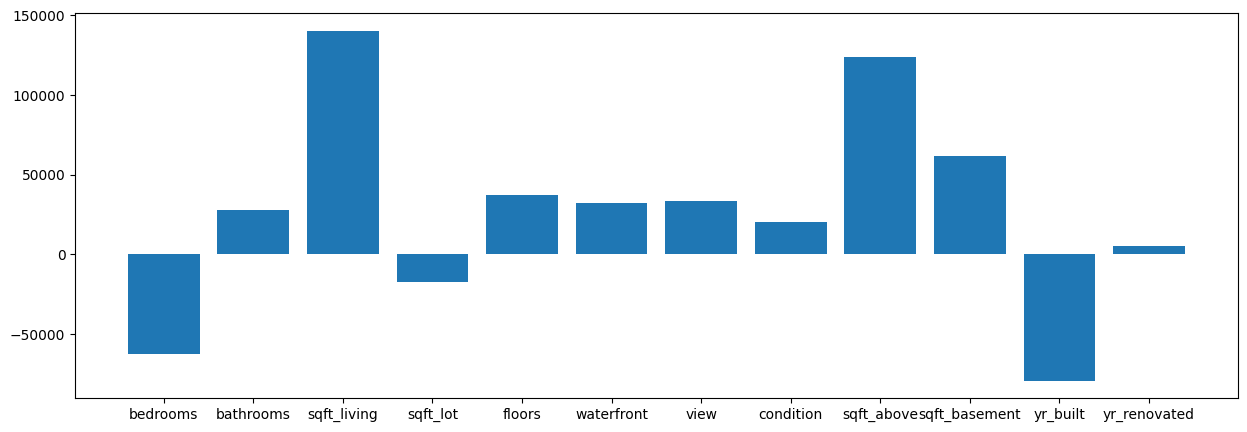

In [70]:
# graph for linear regression model
plt.figure(figsize=(15, 5))
plt.bar(x.columns, l_model.coef_)
plt.show()

In [71]:
# Train it with lasso regression
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test, y_test)*100

4.493519843253491

In [72]:
print(mean_squared_error(y_test, lasso_reg.predict(X_test)))
print(mean_absolute_error(y_test, lasso_reg.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, lasso_reg.predict(X_test))))

804466205277.1113
203115.57516737573
896920.4007475309


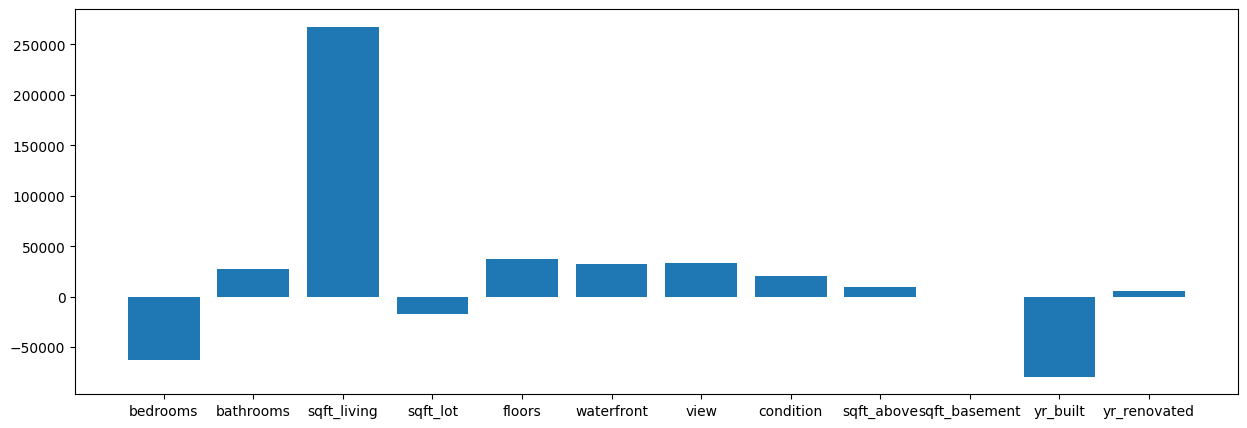

In [73]:
# Graph for lasso regularization
plt.figure(figsize=(15, 5))
plt.bar(x.columns, lasso_reg.coef_)
plt.show()

In [74]:
# Train it with Ridge regression
ridge_reg.fit(X_train, y_train)
ridge_reg.score(X_test, y_test)*100

4.507437608716469

In [75]:
print(mean_squared_error(y_test, ridge_reg.predict(X_test)))
print(mean_absolute_error(y_test, ridge_reg.predict(X_test)))
print(np.sqrt(mean_squared_error(y_test, ridge_reg.predict(X_test))))

804348973734.8163
203015.1927817313
896855.0461110292


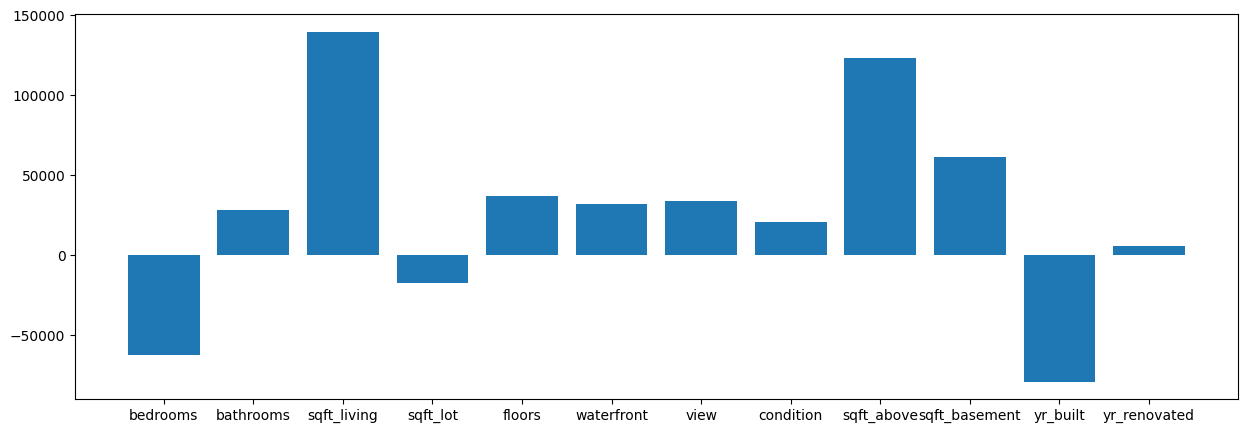

In [64]:
# Graph for Ridge regularization
plt.figure(figsize=(15, 5))
plt.bar(x.columns, ridge_reg.coef_)
plt.show()